In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

In [45]:
file_path = r'12. glass.xlsx'
df = pd.read_excel(file_path, sheet_name=None) 

In [46]:
print("Sheet names:", df.keys())

Sheet names: dict_keys(['Description', 'glass'])


In [47]:
df_glass = pd.read_excel(file_path, sheet_name = 'glass')

In [48]:
df_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [49]:
# ----------------------------------------------------1. Exploratory Data Analysis (EDA):----------------------------------------------------------

# Perform exploratory data analysis to understand the structure of the dataset.
# Check for missing values, outliers, inconsistencies in the data.
print("Dataset Shape:", df_glass.shape) 

Dataset Shape: (214, 10)


In [50]:
print("\nData Types:\n", df_glass.dtypes)


Data Types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [51]:
print("\nFirst 5 rows:\n", df_glass.head())


First 5 rows:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [52]:
print("\nSummary Statistics:\n", df_glass.describe())


Summary Statistics:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.0

In [53]:
print("\nMissing Values in Each Column:\n", df_glass.isnull().sum())


Missing Values in Each Column:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


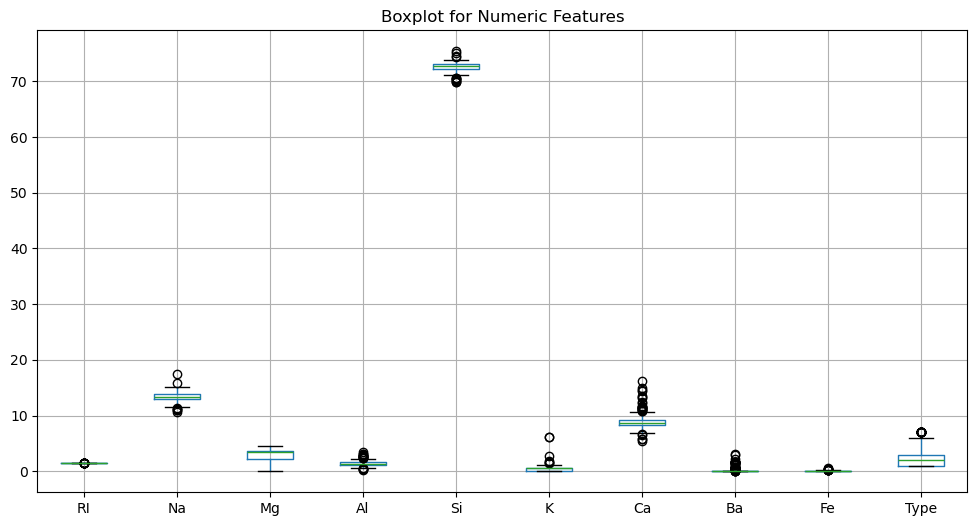

In [54]:
numeric_cols = df_glass.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,6))
df_glass[numeric_cols].boxplot()
plt.title("Boxplot for Numeric Features")
plt.show()

In [55]:
# Check for Inconsistencies

duplicates = df_glass.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

categorical_cols = df_glass.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

Number of duplicate rows: 1


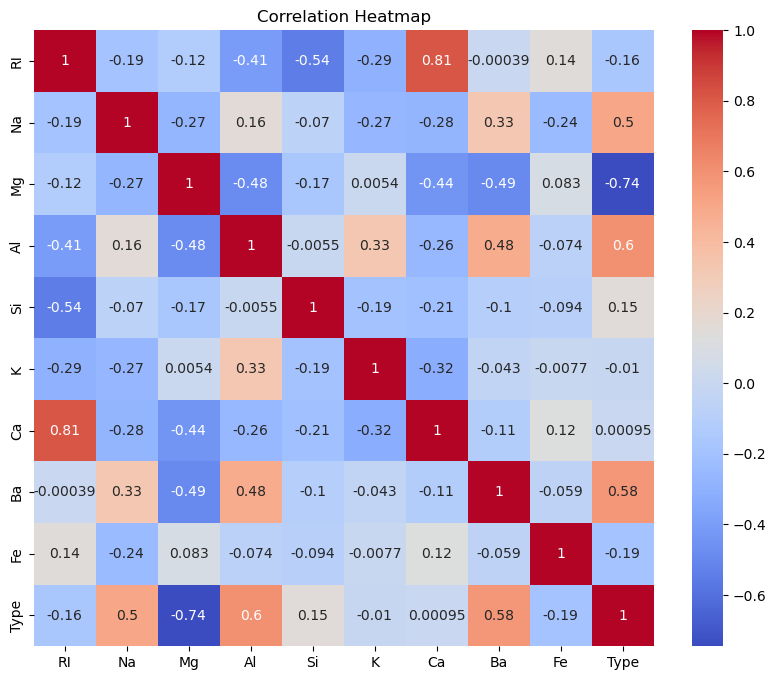

In [56]:
 # Visualize Relationships

plt.figure(figsize=(10,8))
sns.heatmap(df_glass.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

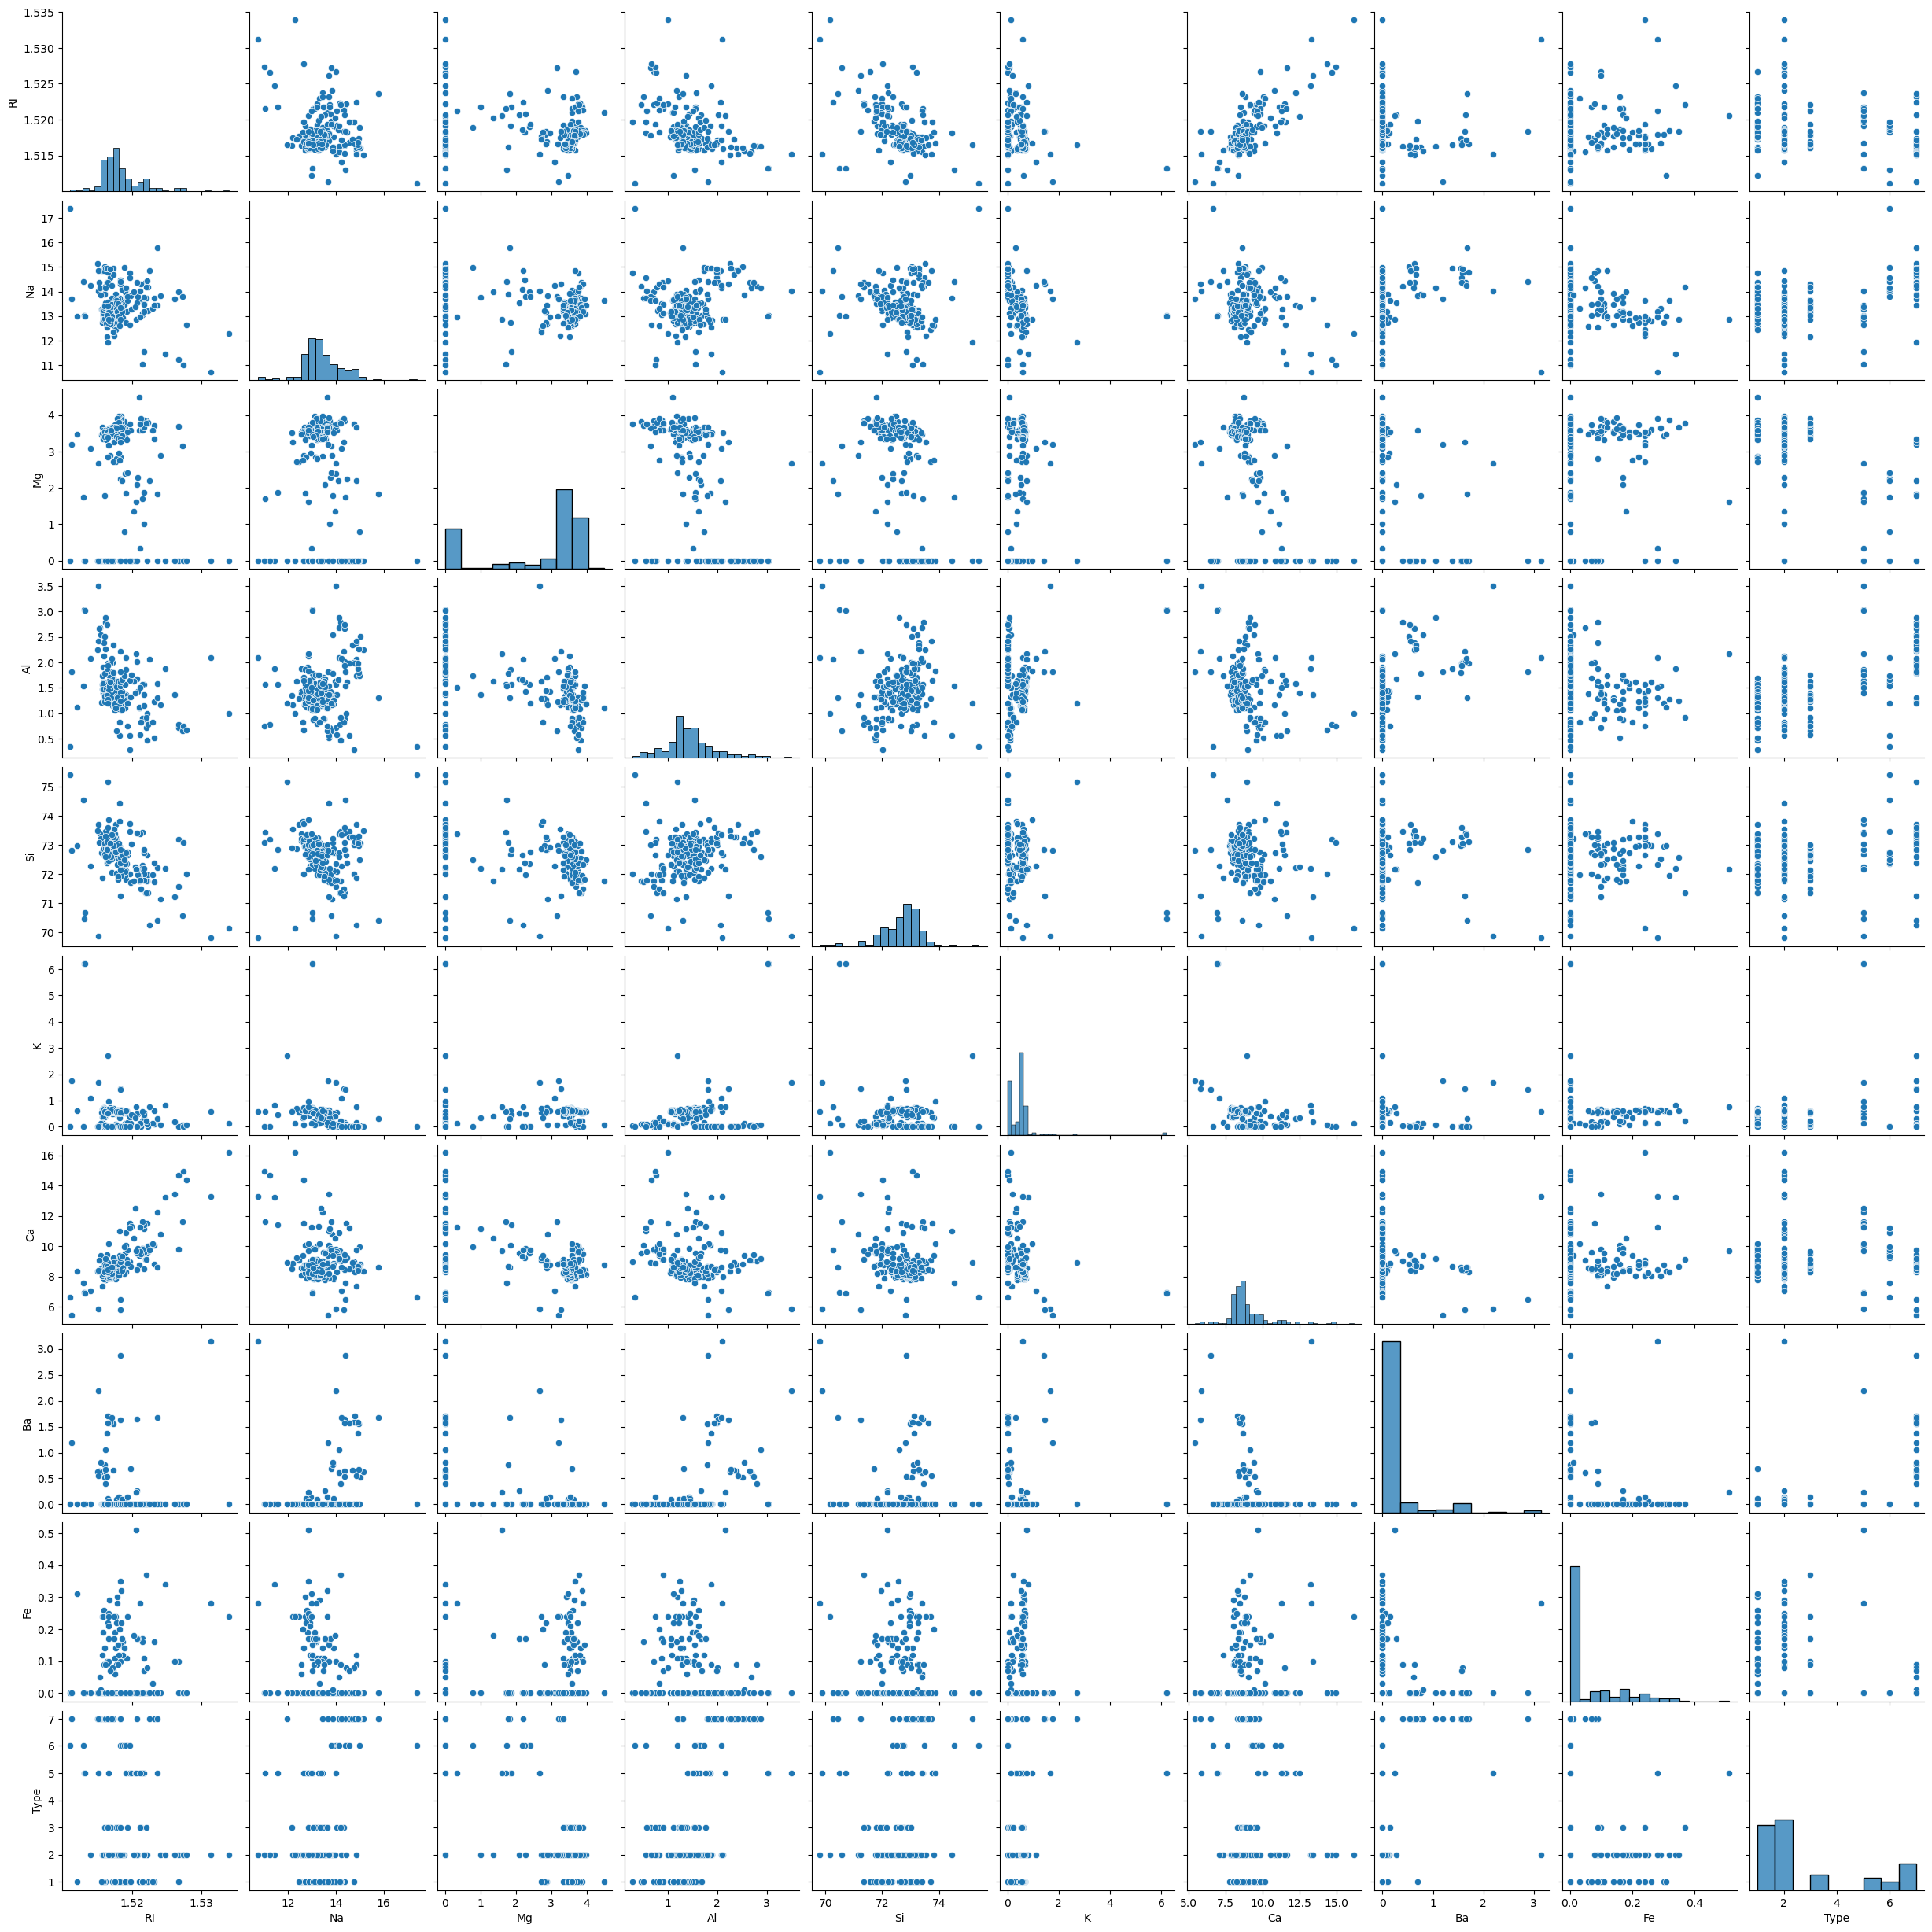

In [57]:
sns.pairplot(df_glass)
plt.show()

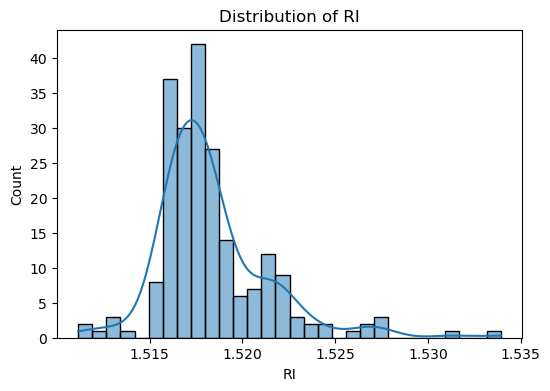

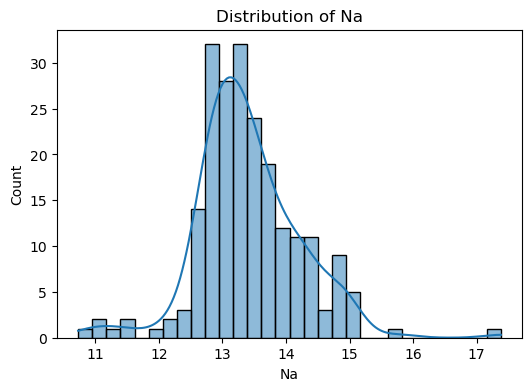

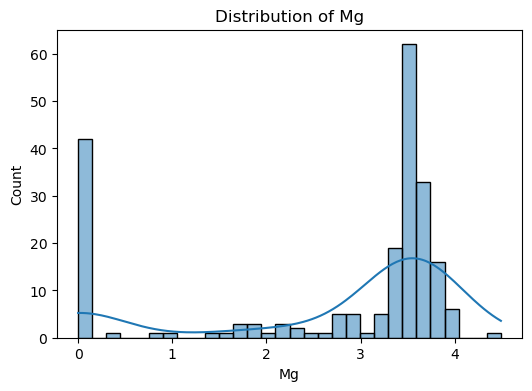

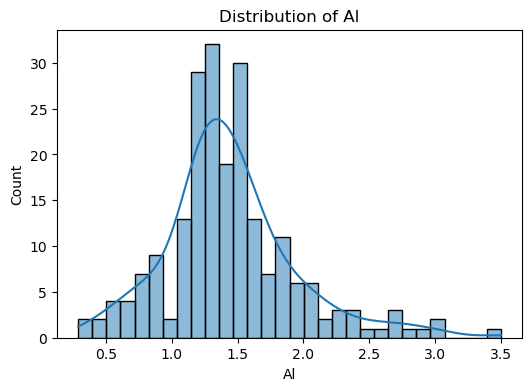

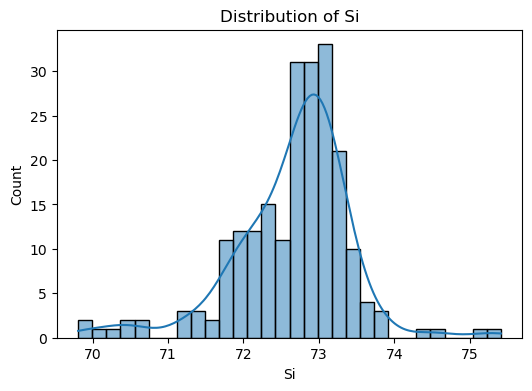

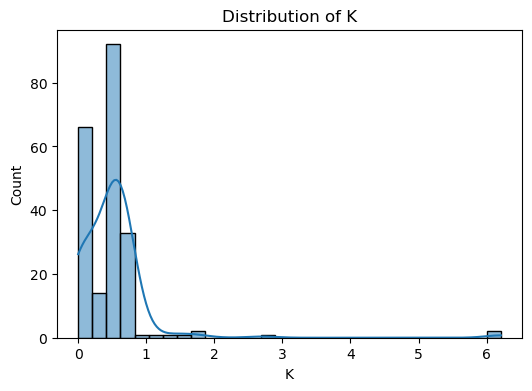

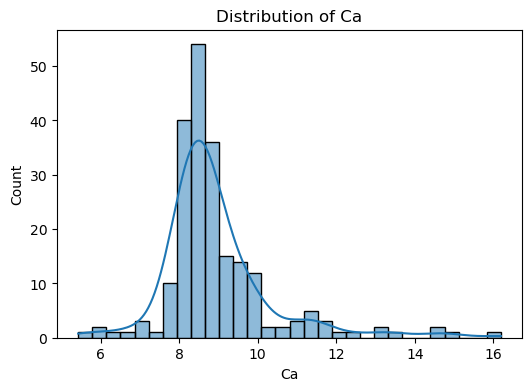

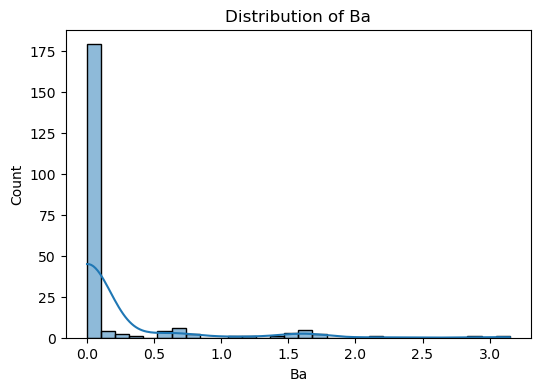

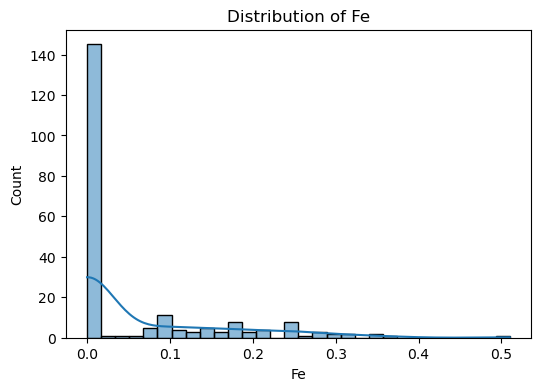

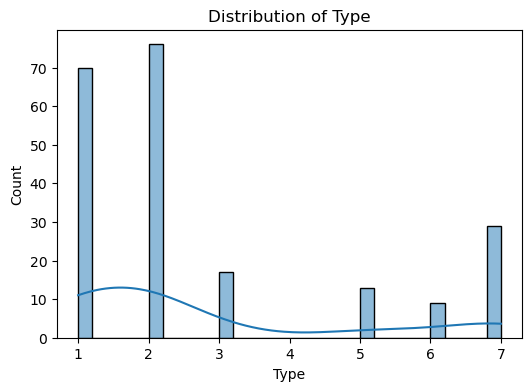

In [58]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_glass[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# # Analyze any patterns or correlations observed in the data.
# The correlation analysis shows that some features are strongly correlated with the target, indicating their predictive potential. 
# Histograms reveal that several features are skewed, suggesting possible data transformation. 
# Outliers were detected in a few numeric features, which may need attention.
# Categorical analysis shows class imbalance in some variables, and scatterplots reveal clear separation between classes for key features, suggesting these features will significantly influence model performance

In [ ]:
#------------------------------------------------------ 3: Data Preprocessing----------------------------------------------------------------------

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [79]:
file_path = r'12. glass.xlsx'
df = pd.read_excel(file_path, sheet_name=None) 

In [80]:
print("Sheet names:", df.keys())

Sheet names: dict_keys(['Description', 'glass'])


In [81]:
df_glass = pd.read_excel(file_path, sheet_name = 'glass')

In [82]:
df_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [84]:
print("Missing values per column:\n", df_glass.isnull().sum())

Missing values per column:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [89]:
for col in numerical_cols:
    df_glass[col] = df_glass[col].fillna(df_glass[col].median())

for col in categorical_cols:
    df_glass[col] = df_glass[col].fillna(df_glass[col].mode()[0])

In [90]:
df_glass.fillna({col: df_glass[col].median() for col in numerical_cols}, inplace=True)
df_glass.fillna({col: df_glass[col].mode()[0] for col in categorical_cols}, inplace=True)

In [91]:
# Encode categorical variables
df = pd.get_dummies(df_glass, columns=categorical_cols, drop_first=True)  

In [92]:
# Feature scaling

scaler = StandardScaler()
df_glass[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [93]:
# Handle imbalanced data
X = df.drop('RI', axis=1)   # Replace 'target' with your target column name
y = df['RI']

In [94]:
print("Class distribution before SMOTE:\n", y.value_counts())

Class distribution before SMOTE:
 RI
1.51645    3
1.52152    3
1.51590    3
1.51784    2
1.51755    2
          ..
1.51732    1
1.51831    1
1.51685    1
1.52065    1
1.51651    1
Name: count, Length: 178, dtype: int64


In [ ]:
#----------------------------------------------- 4: Random Forest Model Implementation--------------------------------------------------------------
# 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [99]:
# 1. Divide the data into train and test split.

from sklearn.model_selection import train_test_split

# Separate features and target
X = df_glass.drop('Type', axis=1)  
y = df_glass['Type']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [101]:
# 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,      
    max_depth=None,        
    random_state=42
)

In [104]:
# 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

# Convert target to integer
y = df_glass['Type'].astype(int)

In [106]:
X = df_glass.drop('Type', axis=1)

y = df_glass['Type'].astype(int)


# Train the model
rf_model.fit(X_train, y_train)

Accuracy: 0.9302325581395349

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       1.00      0.50      0.67         4
           2       0.86      1.00      0.92         6

    accuracy                           0.93        43
   macro avg       0.93      0.82      0.85        43
weighted avg       0.93      0.93      0.92        43



In [107]:
# Predictions
y_pred = rf_model.predict(X_test)

In [108]:
#Evaluation
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9302325581395349

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       1.00      0.50      0.67         4
           2       0.86      1.00      0.92         6

    accuracy                           0.93        43
   macro avg       0.93      0.82      0.85        43
weighted avg       0.93      0.93      0.92        43



In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Features and target
X = df_glass.drop('Type', axis=1)
y = df_glass['Type'].astype(int)  # Ensure target is discrete

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [111]:
#-------------------------------------------------5: Bagging and Boosting Methods--------------------------------------------------------------------
# Apply the Bagging and Boosting methods and compare the results.

from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost
ada_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Train
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Evaluate
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nAdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.9302325581395349

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.57      1.00      0.73         4
           2       1.00      1.00      1.00         6

    accuracy                           0.93        43
   macro avg       0.86      0.97      0.89        43
weighted avg       0.96      0.93      0.94        43



In [112]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9302325581395349

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.67      0.50      0.57         4
           2       1.00      1.00      1.00         6

    accuracy                           0.93        43
   macro avg       0.87      0.82      0.84        43
weighted avg       0.92      0.93      0.93        43



In [ ]:
Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
Bagging (Bootstrap Aggregating):
. Trains multiple models in parallel on random subsets of data.
. Reduces variance and prevents overfitting.
. Example: Random Forest.

Boosting:
. Trains models sequentially, each correcting previous errors.
. Reduces bias, improves accuracy on hard-to-predict samples.
. Examples: AdaBoost, Gradient Boosting.

Difference: Bagging (Bootstrap Aggregating) trains multiple models in parallel on random subsets of the data and combines their predictions to reduce variance and prevent overfitting, with all samples treated equally. Boosting, on the other hand, trains models sequentially, where each new model focuses on the misclassified samples from previous models, reducing bias and improving accuracy. Examples of Bagging include Random Forest, while Boosting includes AdaBoost and Gradient Boosting.

2. Explain how to handle imbalance in the data.